In [8]:
## TASK_1:-TOP CUISINES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Project/Dataset .csv')

df.head()
df.shape
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [12]:
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df = df.drop_duplicates()
df = df[df['Aggregate rating'] > 0]
df['Has Online delivery'] = df['Has Online delivery'].str.strip()
df.isnull().sum()
df.shape

## Data Cleaning Summary
##- Dataset was inspected using df.info()
##- Missing values in the Cuisines column were handled
##- Duplicate rows were removed
##- Restaurants with zero aggregate ratings were excluded
##- Categorical values were standardized


(7403, 21)

In [14]:
cuisines = df['Cuisines'].str.split(', ')
all_cuisines = cuisines.explode()

top_3_cuisines = all_cuisines.value_counts().head(3)
top_3_cuisines

percentage = (top_3_cuisines / len(df)) * 100
percentage


### Task 1: Top Cuisines
##The top three most common cuisines in the dataset are shown above.
##These cuisines are served by approximately the calculated percentage
##of restaurants, indicating their popularity.


,count
Cuisines,
North Indian,40.753748
Chinese,29.501553
Fast Food,21.113062


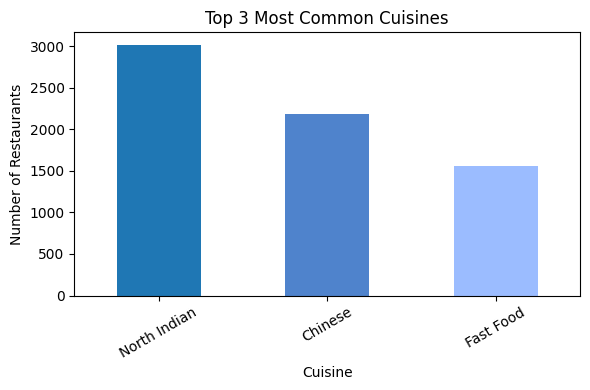

In [18]:
plt.figure(figsize=(6,4))
top_3_cuisines.plot(kind='bar',color=['#1f77b4', '#4f83cc', '#9bbcff'])

plt.title('Top 3 Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


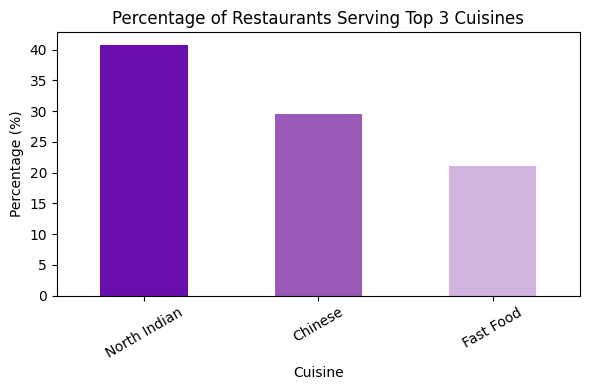

In [19]:
percentage = (top_3_cuisines / len(df)) * 100

plt.figure(figsize=(6,4))
percentage.plot(kind='bar', color=['#6a0dad', '#9b59b6', '#d2b4de'])

plt.title('Percentage of Restaurants Serving Top 3 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Percentage (%)')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [20]:
### Task 1: Top Cuisines – Conclusion
## The analysis identified the top three most common cuisines served by restaurants.
## These cuisines account for a significant percentage of the dataset, indicating
## their high demand and popularity among customers.


In [21]:
#TASK_2:-TASK ANALYSIS
city_counts = df['City'].value_counts()
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

top_city, top_city_count


('New Delhi', 4048)

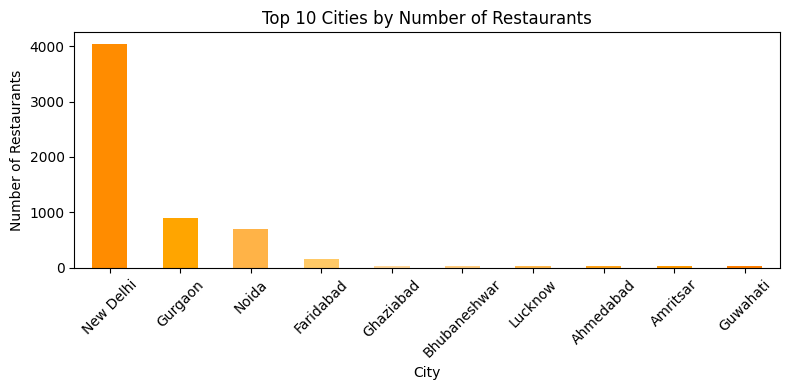

In [24]:
plt.figure(figsize=(8,4))
top_10_cities.plot(
    kind='bar',
    color=['#ff8c00', '#ffa500', '#ffb347', '#ffc966', '#ffd699',
           '#ffcc80', '#ffb84d', '#ffa31a', '#ff9900', '#ff7f00']
)

plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [27]:
city_avg_rating = (
    df.groupby('City')['Aggregate rating']
      .mean()
      .sort_values(ascending=False)
)

city_avg_rating.head(10)


,Aggregate rating
City,
Inner City,4.900000
Quezon City,4.800000
Makati City,4.650000
Pasig City,4.633333
Mandaluyong City,4.625000
Beechworth,4.600000
London,4.535000
Taguig City,4.525000
Secunderabad,4.500000


In [28]:
best_city = city_avg_rating.idxmax()
best_rating = city_avg_rating.max()

best_city, round(best_rating, 2)

('Inner City', 4.9)

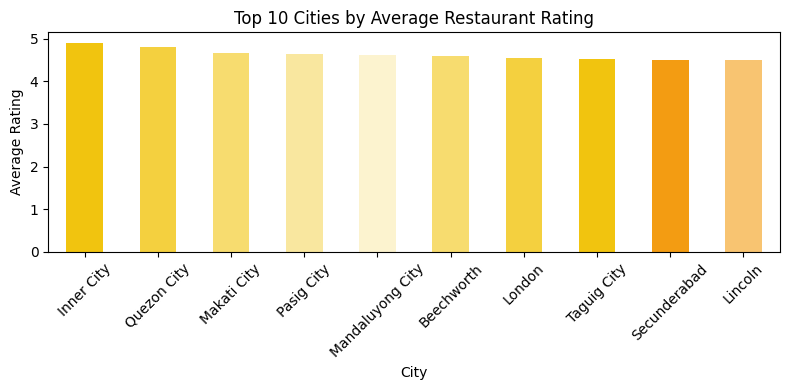

In [31]:
top_10_avg = city_avg_rating.head(10)

plt.figure(figsize=(8,4))
top_10_avg.plot(
    kind='bar',
    color=['#f1c40f', '#f4d03f', '#f7dc6f', '#f9e79f', '#fcf3cf',
           '#f7dc6f', '#f4d03f', '#f1c40f', '#f39c12', '#f8c471']
)

plt.title('Top 10 Cities by Average Restaurant Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
### Task 2: City Analysis – Insights
## - The city with the highest number of restaurants is **{top_city}**, with **{top_city_count}** restaurants.
## - Average restaurant ratings vary significantly across cities.
## - **{best_city}** has the highest average restaurant rating of approximately **{best_rating:.2f}**.


In [36]:
## TASK_3:-Price Range Distributuion

price_counts = df['Price range'].value_counts().sort_index()
price_counts

,count
Price range,
1,2744
2,2711
3,1373
4,575


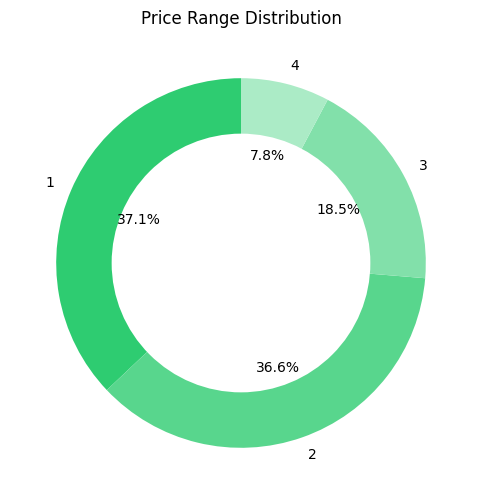

In [37]:
plt.figure(figsize=(6,6))

plt.pie(
    price_counts,
    labels=price_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#2ecc71', '#58d68d', '#82e0aa', '#abebc6']
)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Price Range Distribution')
plt.show()


In [41]:
price_percentage = (price_counts / price_counts.sum()) * 100
price_percentage.round(2)


,count
Price range,
1,37.07
2,36.62
3,18.55
4,7.77


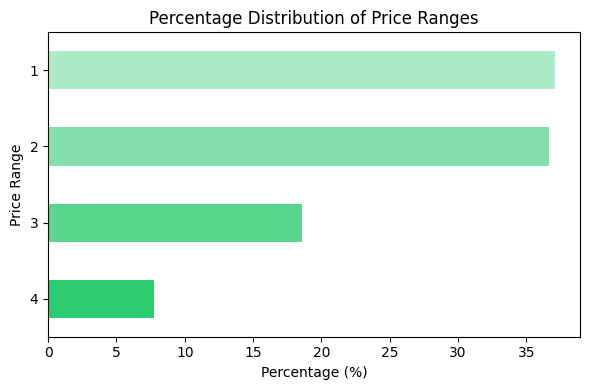

In [43]:
plt.figure(figsize=(6,4))

price_percentage.sort_values().plot(
    kind='barh',
    color=['#2ecc71', '#58d68d', '#82e0aa', '#abebc6']
)

plt.title('Percentage Distribution of Price Ranges')
plt.xlabel('Percentage (%)')
plt.ylabel('Price Range')
plt.tight_layout()
plt.show()


In [44]:
### Task 3: Price Range Distribution – Insights
## - The donut chart illustrates the distribution of restaurants across different price ranges.
## - A majority of restaurants fall within the lower price range categories.
## - Higher price range restaurants constitute a smaller portion of the dataset.


In [47]:
delivery_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean()
delivery_rating.round(2)


,Aggregate rating
Has Online delivery,
No,3.47
Yes,3.38


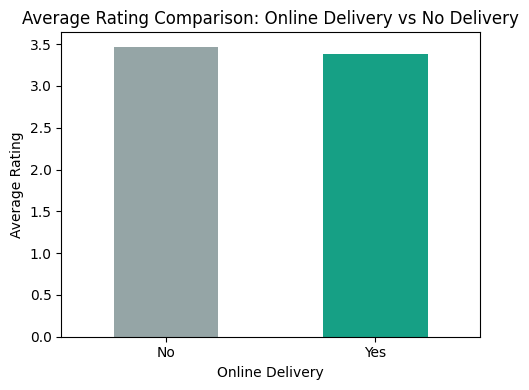

In [51]:
plt.figure(figsize=(5,4))

delivery_rating.plot(
    kind='bar',
    color=['#95a5a6', '#16a085']  # Yes = Teal, No = Grey
)

plt.title('Average Rating Comparison: Online Delivery vs No Delivery')
plt.xlabel('Online Delivery')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
### Task 4: Online Delivery – Insights
## - Restaurants offering online delivery and those that do not show a noticeable difference in average ratings.
## - This comparison highlights how service availability may influence customer perception.
